In [1]:
#import lib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#sklearn cluster lib

In [5]:
from sklearn.cluster import KMeans

In [6]:
#data

In [8]:
data = pd.read_csv('countries_continent.csv')

In [9]:
data.head(10)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


In [10]:
#mapping the data continent

In [12]:
data.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [13]:
data_map = data.copy()

In [14]:
data_map['continent'] = data['continent'].map({'North America':0,
                                              'Asia':1,
                                              'Africa':2,
                                              'Europe':3,
                                              'South America':4,
                                              'Oceania':5,
                                              'Antarctica':6,
                                              'Seven seas (open ocean)':7})

In [15]:
data_map.head(10)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
5,Aland,19.953288,60.214887,3
6,Andorra,1.560544,42.542291,3
7,United Arab Emirates,54.300167,23.905282,1
8,Argentina,-65.179807,-35.381349,4
9,Armenia,44.929933,40.289526,1


In [17]:
data_map.info() #to check if all continent column has int value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
name         241 non-null object
Longitude    241 non-null float64
Latitude     241 non-null float64
continent    241 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.6+ KB


In [18]:
#choosing feature

In [19]:
x = data_map.iloc[:,-1:]

In [20]:
x.head(5)

,continent
0,0
1,1
2,2
3,0
4,3


In [21]:
#cluster with sklearn

In [60]:
Kmeans  = KMeans(5) #5 cluster will be shown

In [61]:
Kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
#finalzing the result

In [63]:
data_cluster = Kmeans.fit_predict(x)

In [64]:
data_cluster

array([0, 0, 3, 0, 4, 4, 4, 0, 1, 0, 1, 2, 1, 2, 0, 1, 4, 0, 3, 4, 3, 3,
       0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 1, 1, 0, 0, 0, 3, 3, 4, 1, 0, 3, 3,
       3, 3, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 4, 4, 3, 0, 4, 0, 3, 1, 3, 3,
       4, 4, 3, 4, 1, 1, 4, 4, 1, 3, 4, 0, 4, 3, 3, 3, 3, 3, 4, 0, 0, 0,
       1, 1, 0, 2, 0, 4, 0, 4, 0, 4, 0, 0, 2, 4, 0, 0, 4, 0, 4, 0, 4, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 0, 4, 0, 0, 0, 3, 3, 0, 4, 0, 3, 4, 4, 4,
       0, 0, 3, 4, 4, 3, 2, 0, 1, 4, 3, 4, 0, 4, 0, 1, 3, 3, 0, 2, 3, 0,
       3, 1, 3, 1, 3, 0, 1, 4, 4, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 4, 0,
       0, 4, 1, 0, 1, 0, 4, 4, 3, 3, 0, 3, 3, 3, 0, 2, 2, 1, 3, 0, 4, 3,
       3, 0, 4, 3, 1, 4, 4, 4, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 3,
       0, 0, 3, 3, 4, 1, 0, 0, 4, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 3, 3])

In [65]:
#adding cluster column to the df

In [66]:
new_data = data_map.copy()

In [67]:
new_data['Cluster'] = data_cluster

In [68]:
new_data.head(15)

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,2,3
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,3,4
5,Aland,19.953288,60.214887,3,4
6,Andorra,1.560544,42.542291,3,4
7,United Arab Emirates,54.300167,23.905282,1,0
8,Argentina,-65.179807,-35.381349,4,1
9,Armenia,44.929933,40.289526,1,0


In [69]:
#plotting area with the help of longitude and latitude

In [70]:
x_axis = new_data['Longitude']
y_axis = new_data['Latitude']
c_scheme = new_data['Cluster']

<function matplotlib.pyplot.show(*args, **kw)>

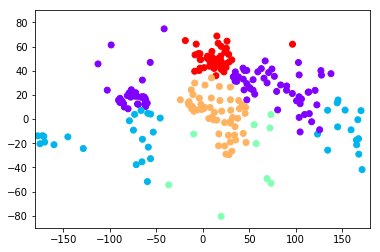

In [71]:
plt.scatter(x_axis,y_axis,c=c_scheme,cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show